CV matching with Job Position through cosine similarity

In cosine similarity, the closest the vectors are and the the smaller their angle is between them, the more similar they are to each other
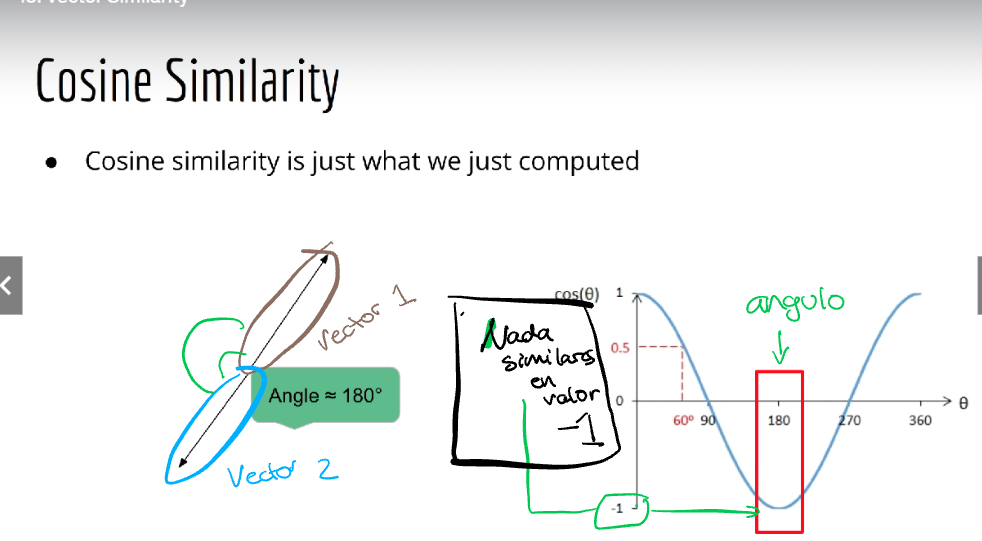

The idea here is to compare how similar the vector of a CV is to the vector of a job description, so the most similar they are, the most appropriate the candidate is for the job description.

In [1]:
# https://www.kaggle.com/tmdb/tmdb-movie-metadata
#!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
import pandas as pd
import matplotlib.pyplot as plt
import json
#iMPORTADO DE  SKLEARN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df = pd.read_csv('my_data.csv')
df

,raw_text,status
0,DIEGO RODOLFO HERRER A RUBIO \nDIEGO RODOLFO...,considerados
1,ricardo herrera\njacobo\nIngeniero Energético ...,considerados
2,\n \n➢ celular. 5549154946 \n➢ dirección. Av...,considerados
3,\n Herman Gregorio Parra Torcatt \nCumbres ...,considerados
4,05/Octubre /2022 \n \n \nJuan Jorge Aparicio...,considerados
5,LUIS ANGEL GRIMALDO\nCERRITOS\nTSU INGENIERIA ...,considerados
6,\n \nCARLOS DAMIAN \nRAMBLAS GASCA \nPERFIL...,no_considerados
7,\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...,no_considerados
8,Nelson Salazar\nIngeniero Electrico\nJerez de ...,no_considerados


In [3]:
jobs = pd.read_csv('jobs.csv')
jobs

,jobs,description
0,Asesor Comercial Comisionista de Paneles Solares,Trabajo por comisión.\r\nTrabajadores independ...
1,Asesor Comercial,Trabajo por comisión.\nTrabajadores independie...
2,Representante de ventas,Trabajo por comisión.\nTrabajadores independie...
3,INSTALADOR,En TERRA ENERGY estamos buscando a nuestro pró...


In [4]:
from nltk.corpus import stopwords
stopwords_espanol = stopwords.words('spanish')
stopwords_cv = ['correo', 'contacto', 'mail', 'email', 'telefono', 'celular','direccion', 'domicilio', 'perfil']
stopwords_espanol = stopwords_espanol + stopwords_cv
stopwords_espanol

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

Remove accents from stopwords

In [15]:
from unicode import unidecode


# remove accents from each string in the array
stopwords_espanol = [unidecode(s) for s in stopwords_espanol]


ModuleNotFoundError: No module named 'unicode'

In [ ]:
#Recuerda que tfidf es una matriz entonces estas diciendo que no podra tener mas de 800 columnas
#keeping the most frecuent terms in the corpus

#I chose 800 words max because the CV and the descriptions are not too long
tfidf = TfidfVectorizer (max_features=800, strip_accents="ascii", lowercase = True stop_words=)

In [ ]:
#vamos crear una matriz de tdidf con los textos del cv
cvs = tfidf.fit_transform(df["raw_text"])
cvs

<9x800 sparse matrix of type '<class 'numpy.float64'>'
	with 1371 stored elements in Compressed Sparse Row format>

In [ ]:
jobsDescription = tfidf.fit_transform(df["description"])

In [ ]:
#de la matriz de tdidfm tomaremos el primer cv para hacer una prueba de query
query = x[0]

In [ ]:
#falta adaptar para hacer comparación
#scores = cosine_similarity(query, x)